# Test plotting utilities

In [1]:
import numpy as np
from bioslds.plotting import FigureManager, show_latent, colorbar

## `FigureManager`

### Tight layout is on by default

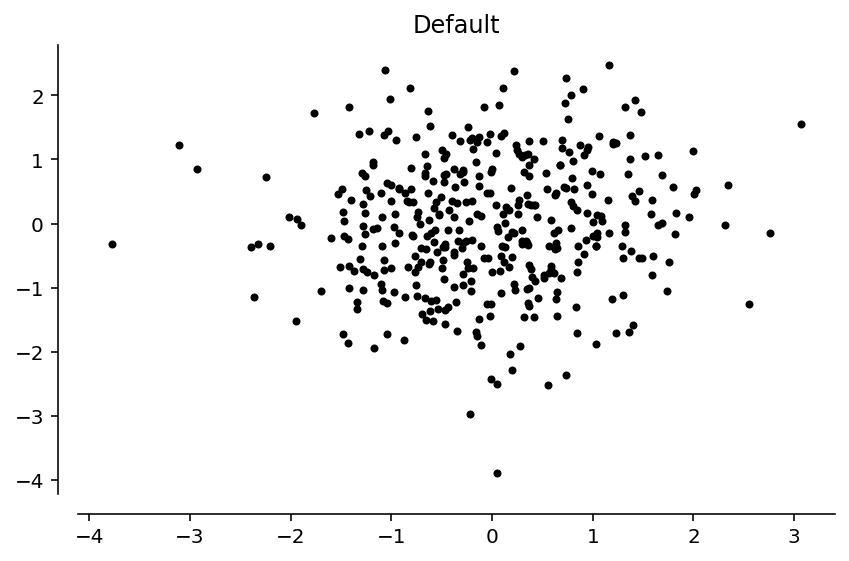

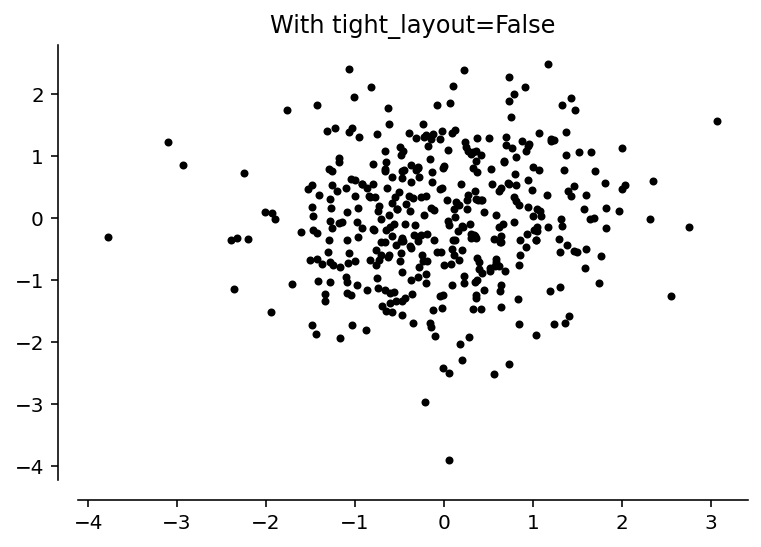

In [2]:
rng = np.random.default_rng(0)
x = rng.normal(size=400)
y = rng.normal(size=400)
with FigureManager() as (fig, ax):
    ax.plot(x, y, '.k')
    ax.set_title("Default")
with FigureManager(tight_layout=False) as (fig, ax):
    ax.plot(x, y, '.k')
    ax.set_title("With tight_layout=False")

### Constrained layout overrides tight layout

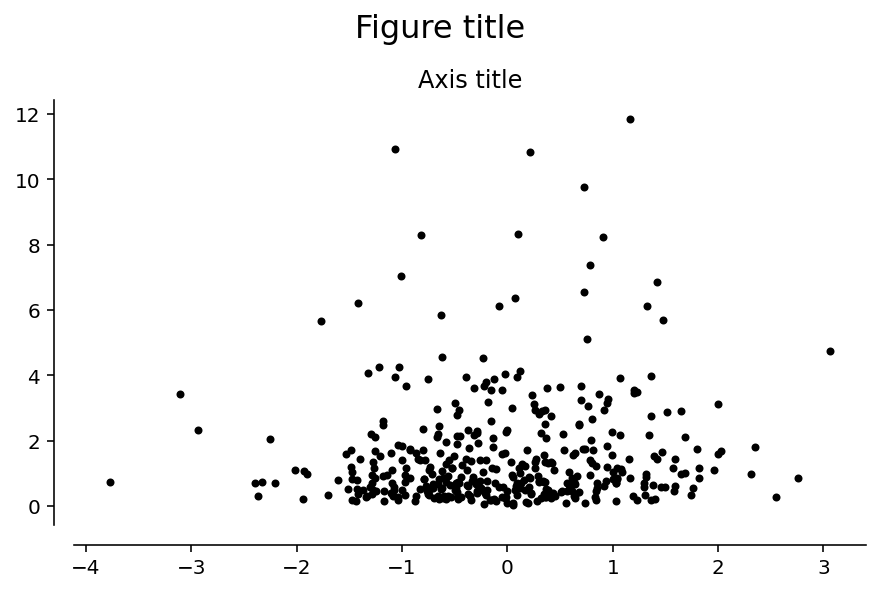

In [3]:
rng = np.random.default_rng(0)
with FigureManager(constrained_layout=True) as (fig, ax):
    ax.plot(rng.normal(size=400), rng.lognormal(size=400), '.k')
    ax.set_title("Axis title")
    fig.suptitle("Figure title", fontsize=16)

### Setting number of supplots and changing `despine` options

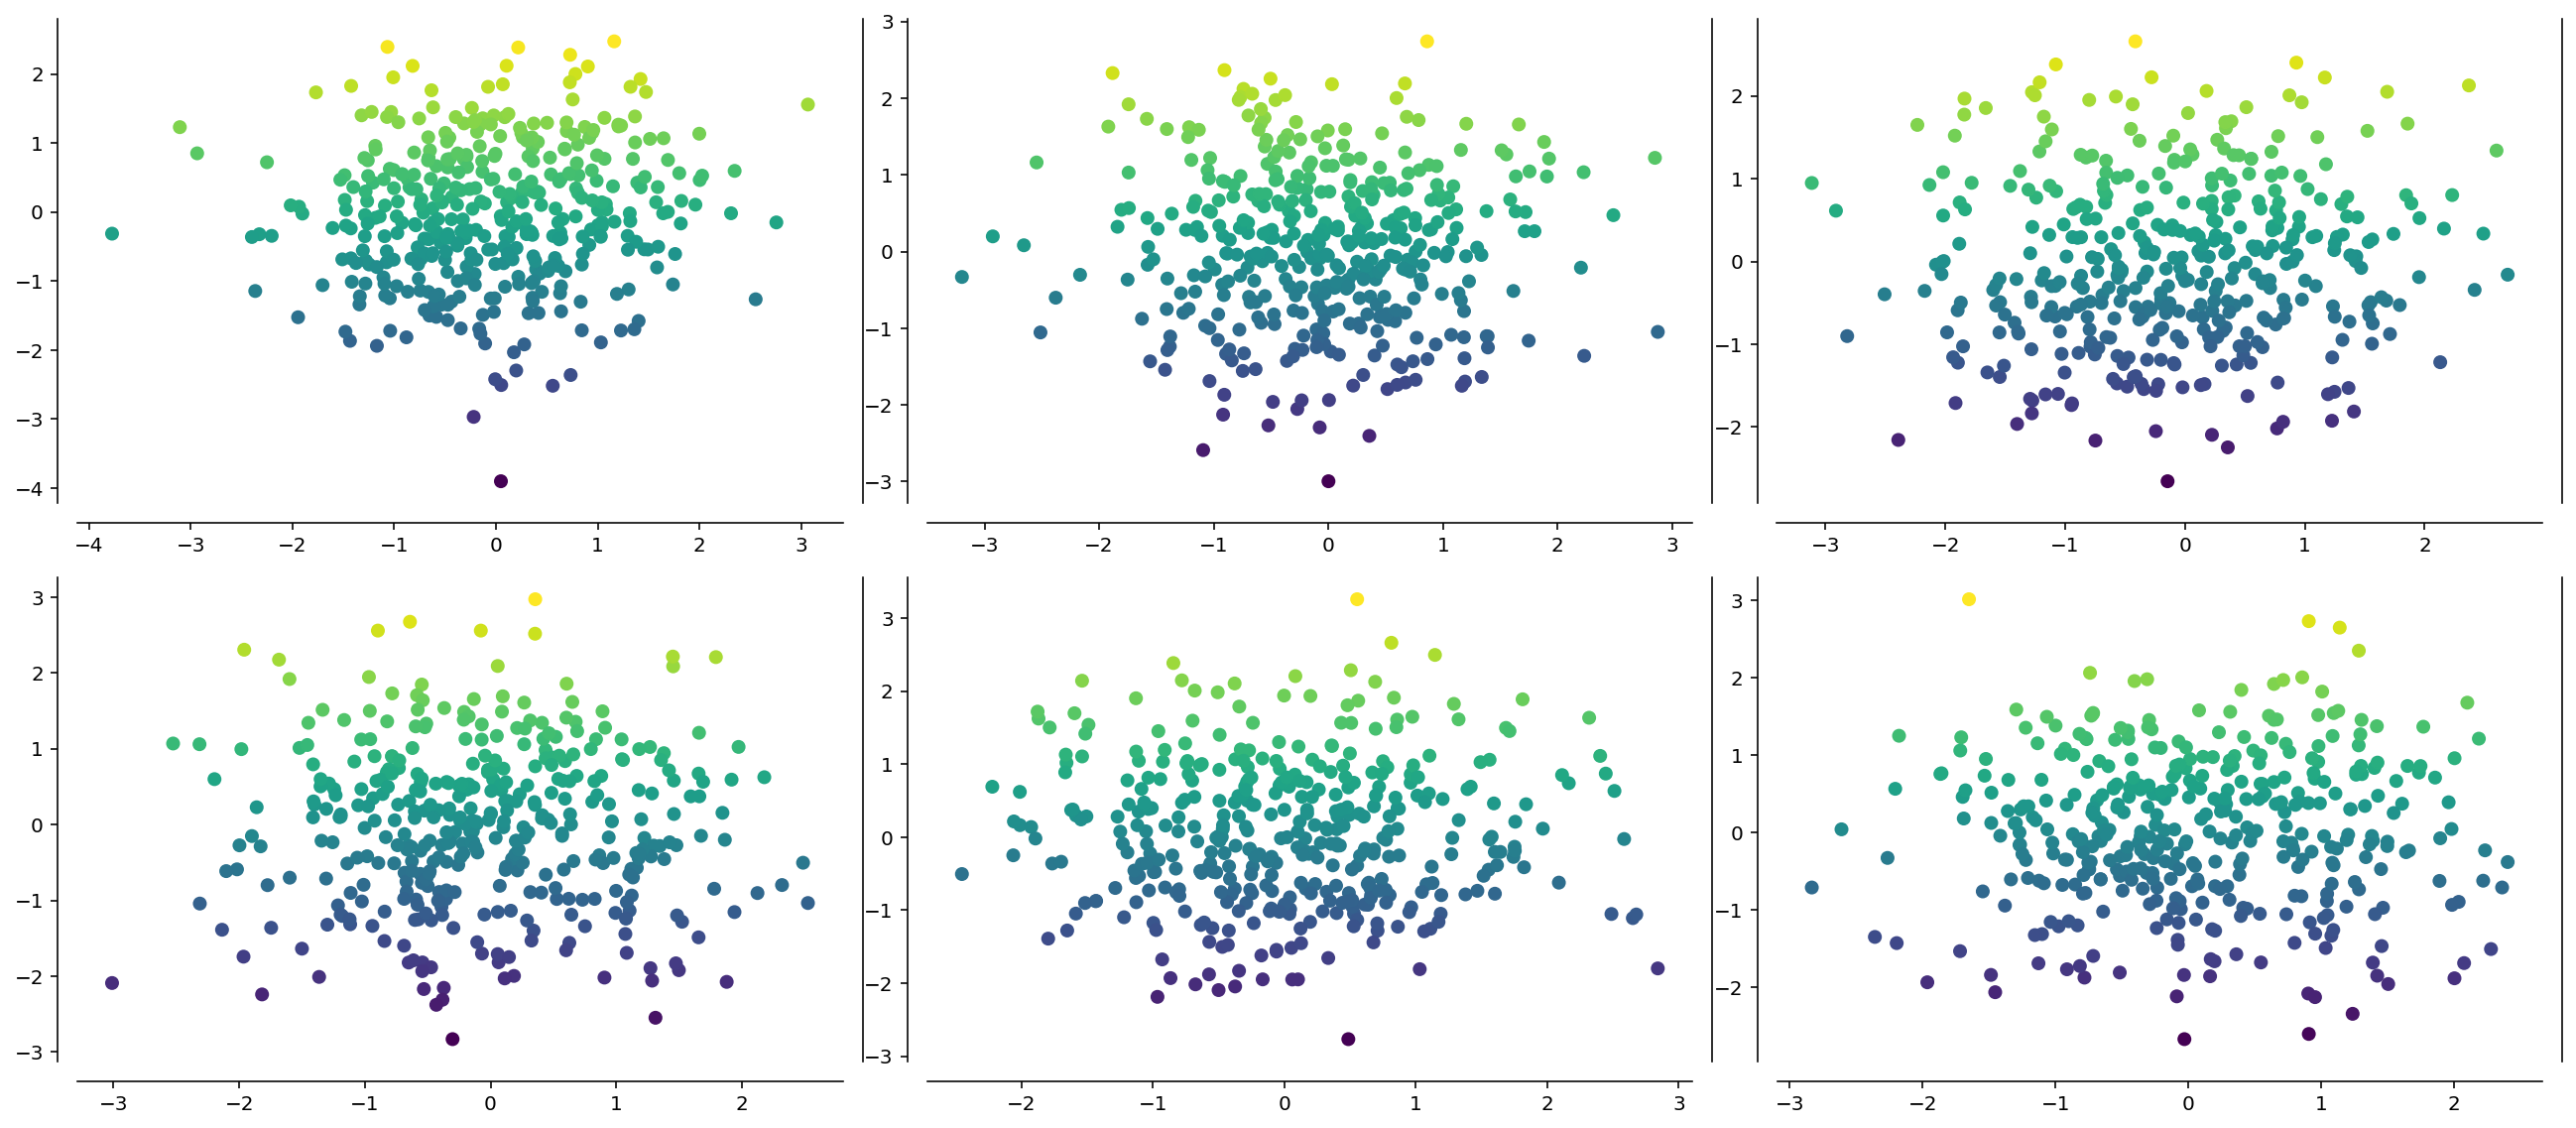

In [4]:
rng = np.random.default_rng(0)
with FigureManager(2, 3, despine_kws={"right": False}) as (_, axs):
    for i in range(axs.shape[0]):
        for j in range(axs.shape[1]):
            ax = axs[i, j]
            x = rng.normal(size=400)
            y = rng.normal(size=400)
            ax.scatter(x, y, c=y)

## `show_latent`

### With default parameters

In [5]:
latent = np.repeat([0, 1, 2, 0, 2, 1], 30)

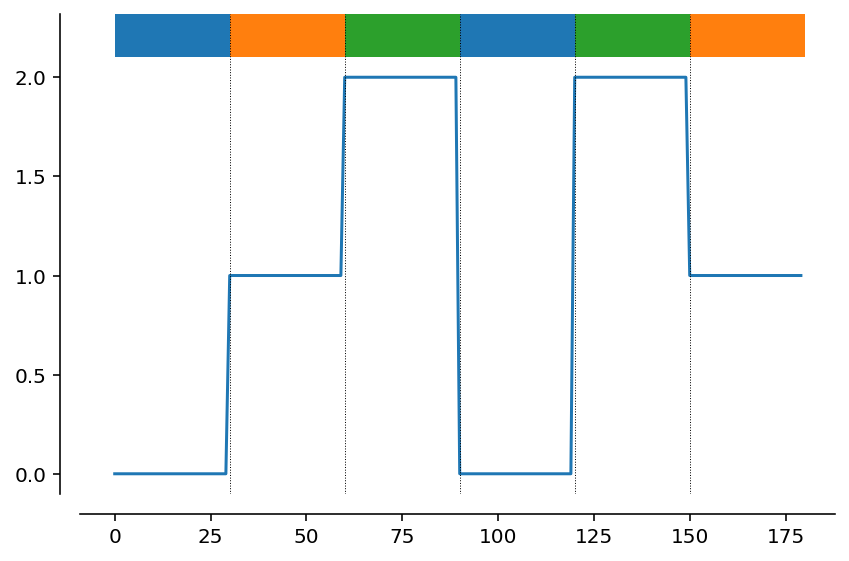

In [6]:
with FigureManager() as (_, ax):
    ax.plot(latent)
    show_latent(latent)

### With various parameters altered

In [7]:
latent = np.repeat([0, 2, 1, 0, 3, 1, 2], 25)

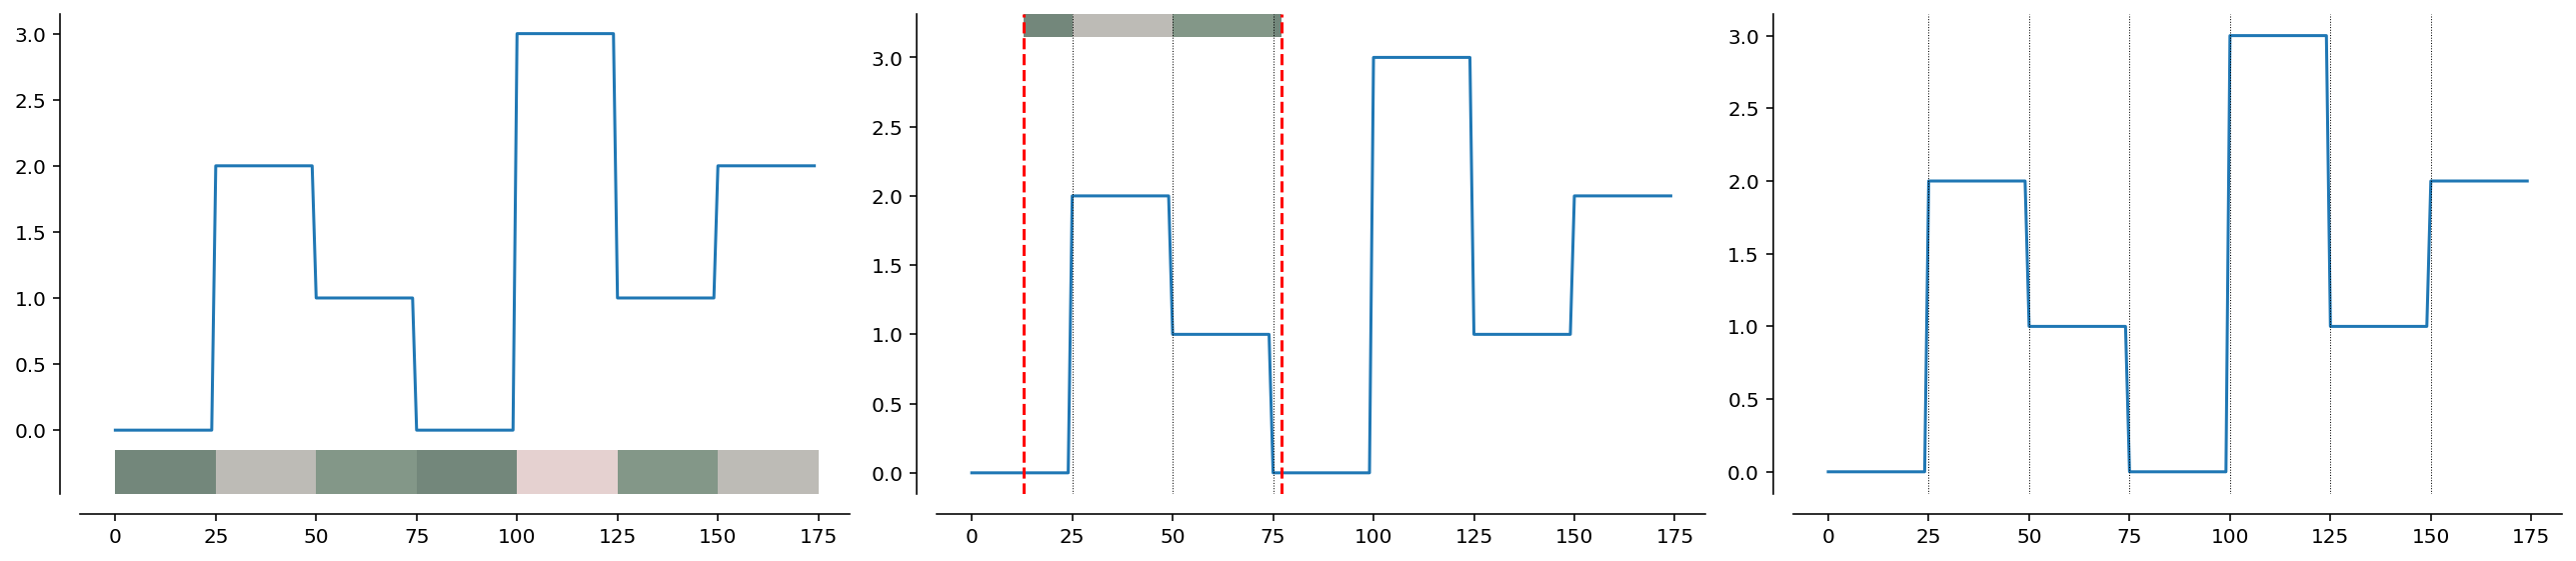

In [8]:
other_colors = ["#73877B", "#839788", "#BDBBB6", "#E5D1D0"]
with FigureManager(1, 3) as (_, (ax1, ax2, ax3)):
    ax1.plot(latent)
    show_latent(latent, ax=ax1, show_vlines=False, bar_location="bottom", colors=other_colors)
    
    ax2.plot(latent)
    crt_bounds = (13, 77)
    show_latent(latent, ax=ax2, bar_width=0.05, colors=other_colors, bounds=crt_bounds)
    ax2.axvline(crt_bounds[0], ls="--", c="r")
    ax2.axvline(crt_bounds[1], ls="--", c="r")
    
    ax3.plot(latent)
    show_latent(latent, ax=ax3, show_bars=False)

### With shift

In [9]:
latent = np.repeat([0, 1, 2, 0, 2, 1], 30)

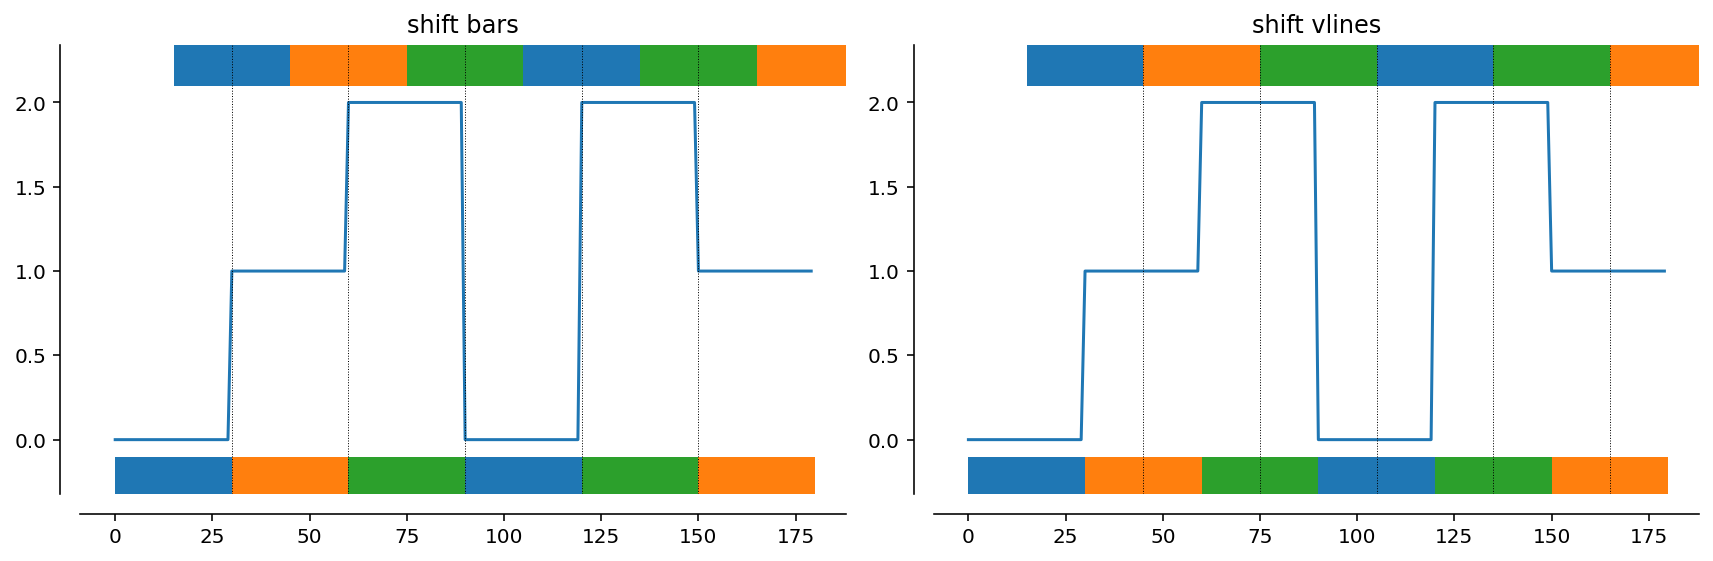

In [10]:
with FigureManager(1, 2) as (_, (ax1, ax2)):
    ax1.plot(latent)
    show_latent(latent, bar_location="bottom", ax=ax1)
    show_latent(latent, shift=15, show_vlines=False, ax=ax1)
    ax1.set_title("shift bars")
    
    ax2.plot(latent)
    show_latent(latent, bar_location="bottom", show_vlines=False, ax=ax2)
    show_latent(latent, shift=15, ax=ax2)
    ax2.set_title("shift vlines")

### Negative and fractional shift

In [11]:
latent = np.tile(np.repeat([0, 1, 2, 0, 2, 1], 30), 100)

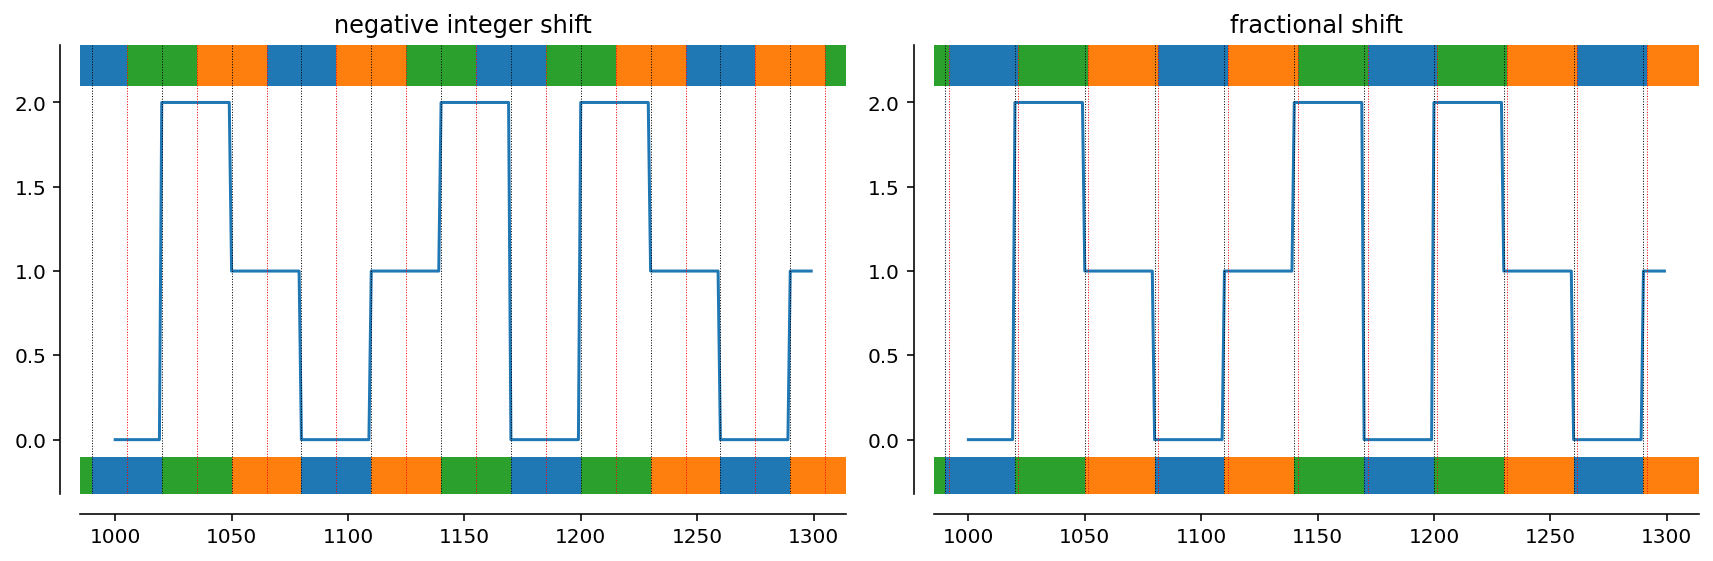

In [12]:
with FigureManager(1, 2) as (_, (ax1, ax2)):
    crt_range = slice(1000, 1300)
    ax1.plot(np.arange(crt_range.start, crt_range.stop), latent[1000:1300])
    show_latent(latent, bar_location="bottom", ax=ax1)
    show_latent(latent, shift=-15, vline_kws={"c": "r"}, ax=ax1)
    ax1.set_title("negative integer shift")

    ax2.plot(np.arange(crt_range.start, crt_range.stop), latent[1000:1300])
    show_latent(latent, bar_location="bottom", ax=ax2)
    show_latent(latent, shift=1.5, vline_kws={"c": "r"}, ax=ax2)
    ax2.set_title("fractional shift")

## `colorbar`

### With default options

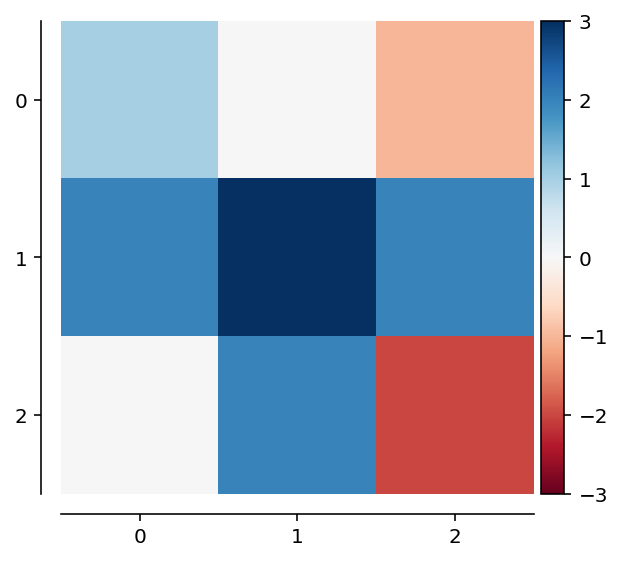

In [13]:
mat = [[1, 0, -1], [2, 3, 2], [0, 2, -2]]
with FigureManager() as (_, ax):
    h = ax.imshow(mat, cmap="RdBu", vmin=-3, vmax=3)
    colorbar(h)
    
    ax.set_xticks([0, 1, 2])
    ax.set_yticks([0, 1, 2])    

### With some changes

Note that using this properly with the location option requires fiddling to avoid overlapping of tick markings (on the plot and/or colorbar).

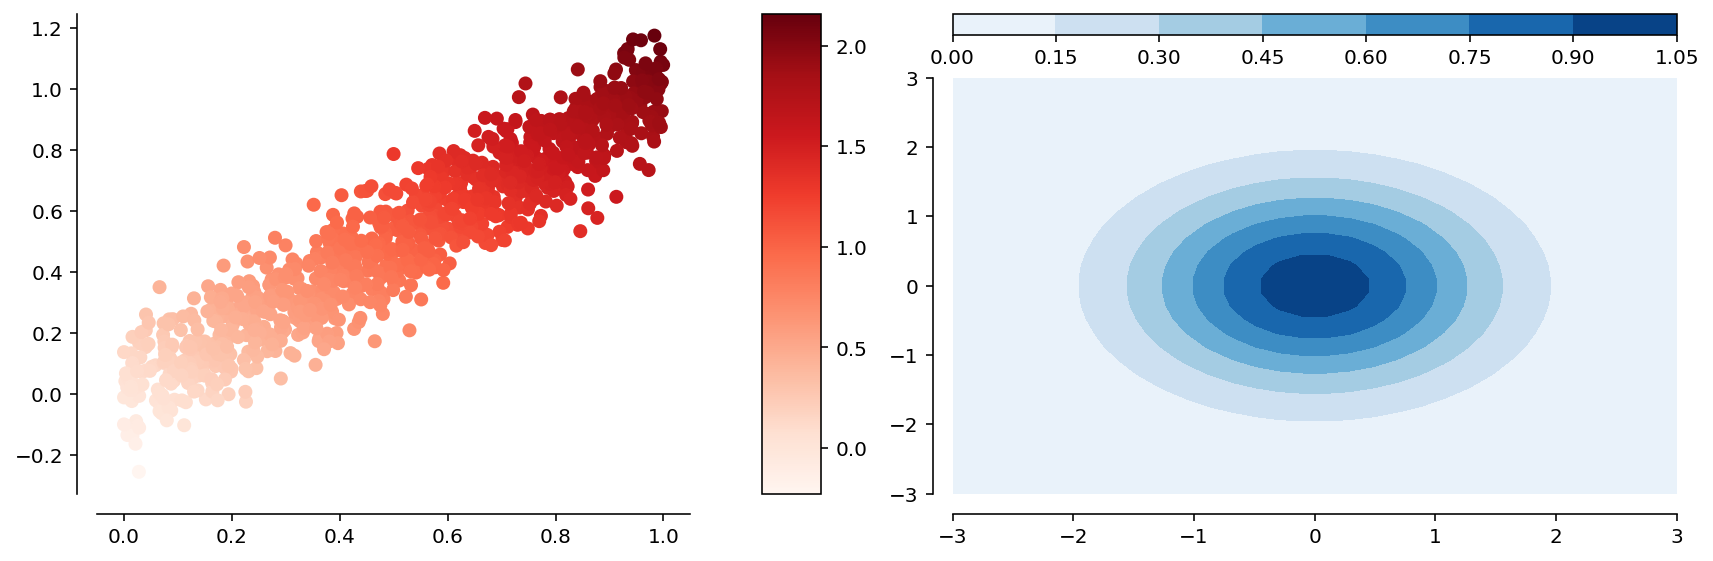

In [14]:
with FigureManager(1, 2) as (_, (ax1, ax2)):
    rng = np.random.default_rng(0)
    values_x = rng.uniform(0, 1, size=1000)
    values_y = values_x + 0.1 * rng.normal(size=len(values_x))

    h = ax1.scatter(values_x, values_y, c=values_x + values_y, cmap="Reds")
    colorbar(h, pad=0.5, fraction=0.1)

    coords_x, coords_y = np.meshgrid(np.linspace(-3, 3, 32), np.linspace(-3, 3, 32))
    values_z = np.exp(-0.5 * (coords_x ** 2 + coords_y ** 2))
    h = ax2.contourf(coords_x, coords_y, values_z, cmap="Blues")
    colorbar(h, location="top", orientation="horizontal", pad=0.3)